<a href="https://colab.research.google.com/github/Rupasri20055/AmesHousing-DataCleaning/blob/main/Task_1_Data_Cleaning_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries and Dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('AmesHousing.csv')

# View first few rows
print(df.head())

# View data types and null counts
print(df.info())

# Summary stats
print(df.describe())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

**Handle Missing Values**

In [3]:
# Check for missing values
print(df.isnull().sum())


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


fill missing numerical values with mean/median and categorical with mode:


In [4]:
# Fill numerical missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


**Convert Categorical Features into Numerical**

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


**Normalize/Standardize Numerical Features**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])


**Visualize and Remove Outliers**

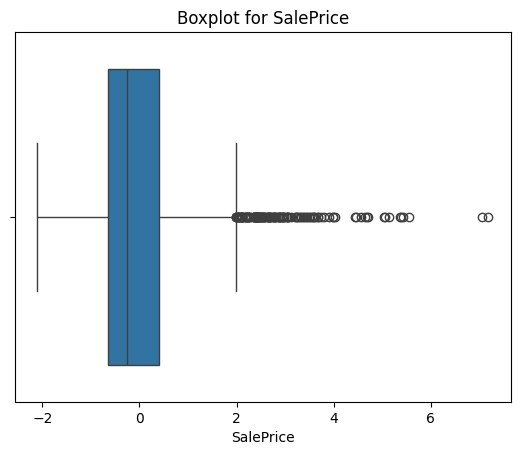

In [7]:
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot for SalePrice')
plt.show()


Remove outliers using the IQR method:

In [8]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]


** Final Check**

In [9]:
print(df.head())
print(df.info())


      Order       PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0 -1.731460 -0.997164    -0.877005          5      3.375742  2.744381       1   
1 -1.730277 -0.996904    -0.877005          4      0.514952  0.187097       1   
2 -1.729095 -0.996899    -0.877005          5      0.561850  0.522814       1   
3 -1.727913 -0.996888    -0.877005          5      1.124628  0.128458       1   
4 -1.726731 -0.992903     0.061285          5      0.233563  0.467348       1   

   Alley  Lot Shape  Land Contour  ...  Pool Area  Pool QC  Fence  \
0      0          0             3  ...  -0.063031        0      2   
1      0          3             3  ...  -0.063031        0      2   
2      0          0             3  ...  -0.063031        0      2   
3      0          3             3  ...  -0.063031        0      2   
4      0          0             3  ...  -0.063031        0      2   

   Misc Feature   Misc Val   Mo Sold   Yr Sold  Sale Type  Sale Condition  \
0             3  -0.0